In [573]:
from sklearn.preprocessing import LabelEncoder
import matplotlib
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [574]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [575]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [576]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [577]:
df.dtypes

Age                 int64
Sex                string
ChestPainType      string
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         string
MaxHR               int64
ExerciseAngina     string
Oldpeak           float64
ST_Slope           string
HeartDisease        int64
dtype: object

In [578]:
string_col=df.select_dtypes("string").columns.to_list()

In [579]:
num_col = df.columns.to_list()
# print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [580]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Exploratory Data Analysis

In [581]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [582]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

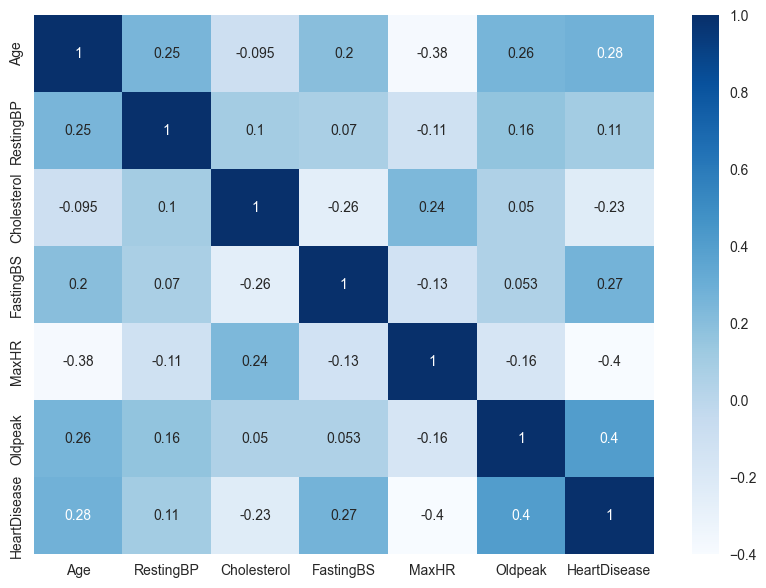

In [583]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

In [584]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig = px.histogram(df,
                   x="HeartDisease",
                   color="Sex",
                   hover_data=df.columns,
                   title="Distribution of Heart Diseases",
                   barmode="group")
fig.show()

In [585]:
fig = px.histogram(df,
                   x="ChestPainType",
                   color="Sex",
                   hover_data=df.columns,
                   title="Types of Chest Pain"
                   )
fig.show()

In [586]:
fig = px.histogram(df,
                   x="Sex",
                   hover_data=df.columns,
                   title="Sex Ratio in the Data")
fig.show()


In [587]:
fig = px.histogram(df,
                   x="RestingECG",
                   hover_data=df.columns,
                   title="Distribution of Resting ECG")
fig.show()


[]

<Figure size 1500x1000 with 0 Axes>

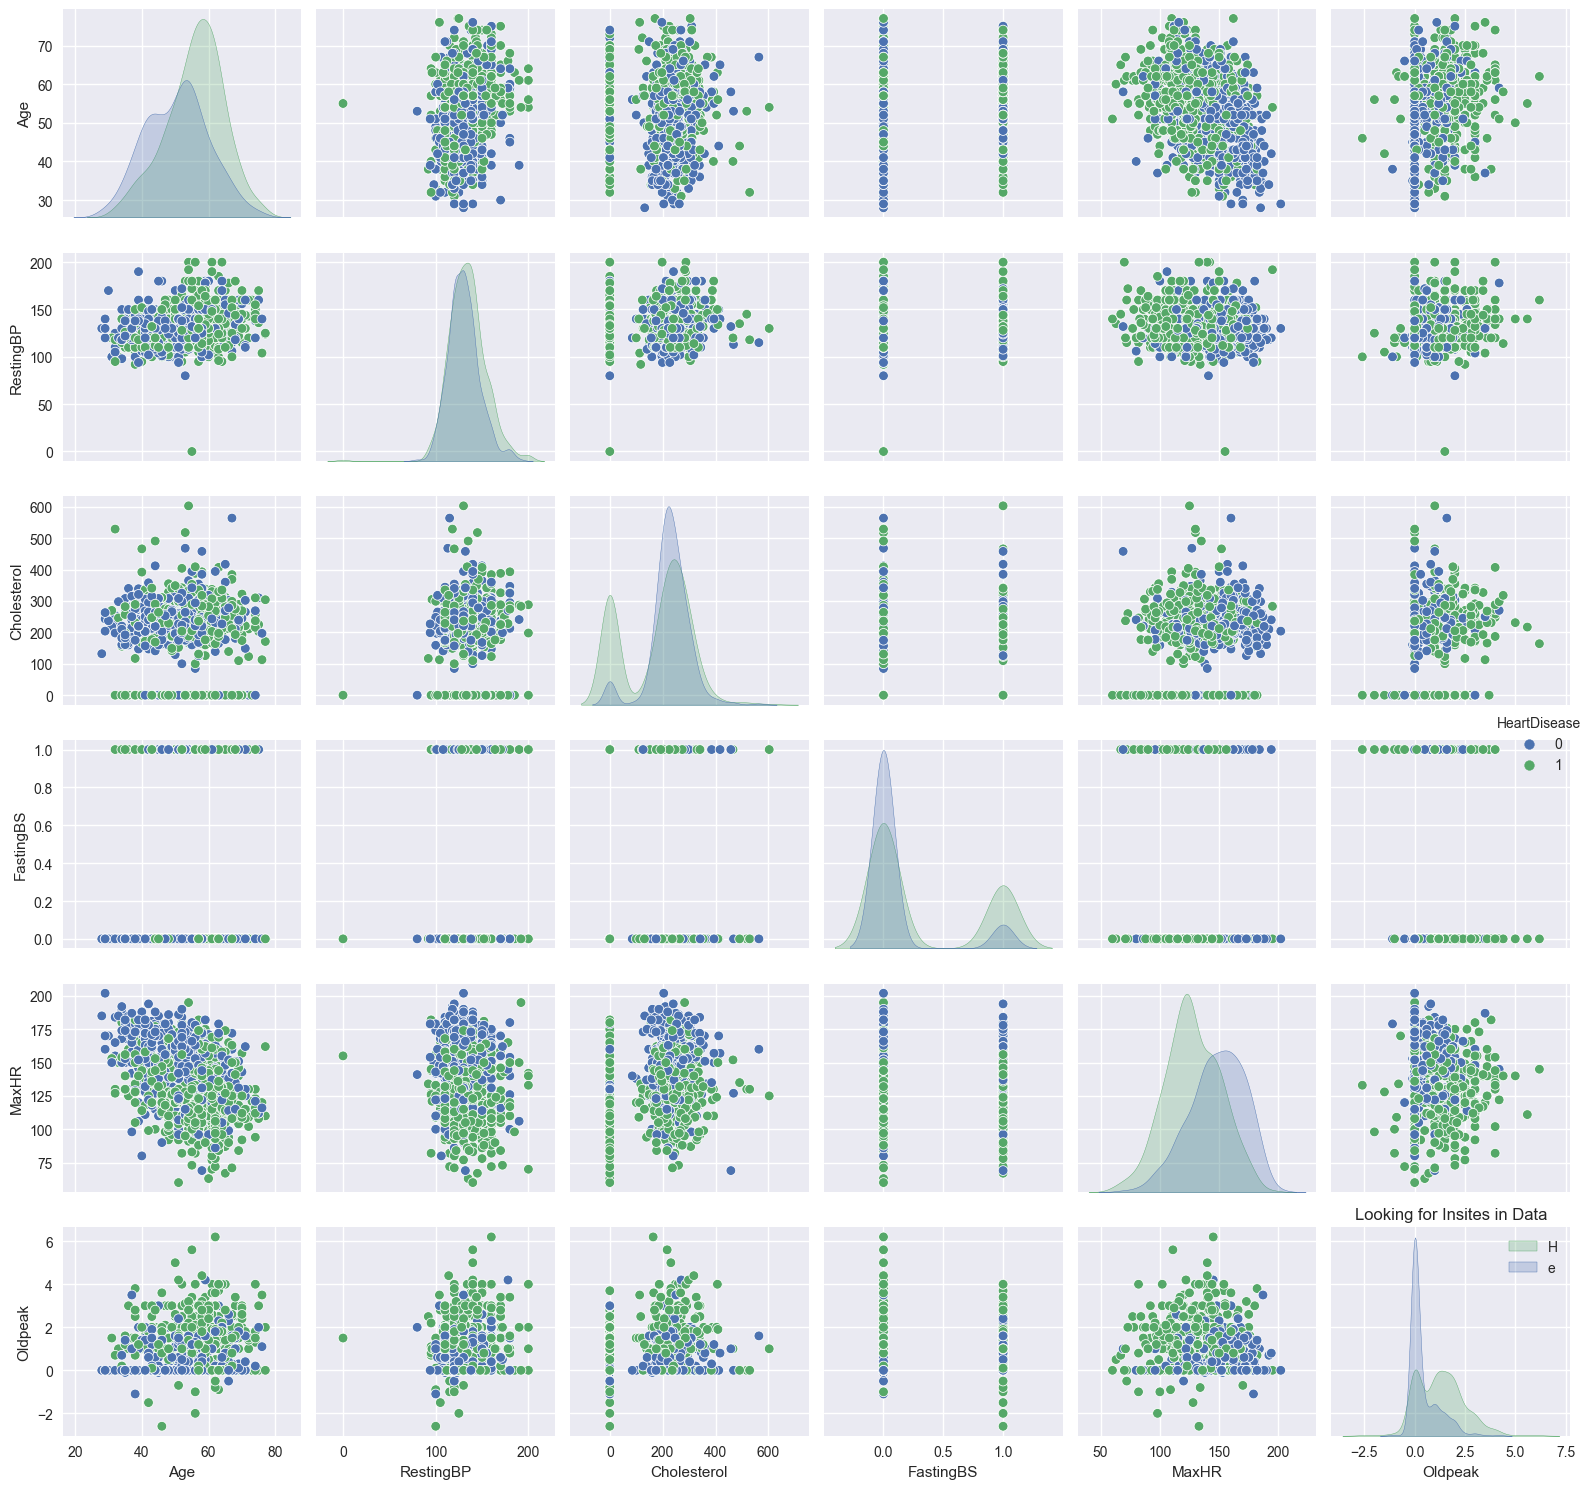

In [588]:
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

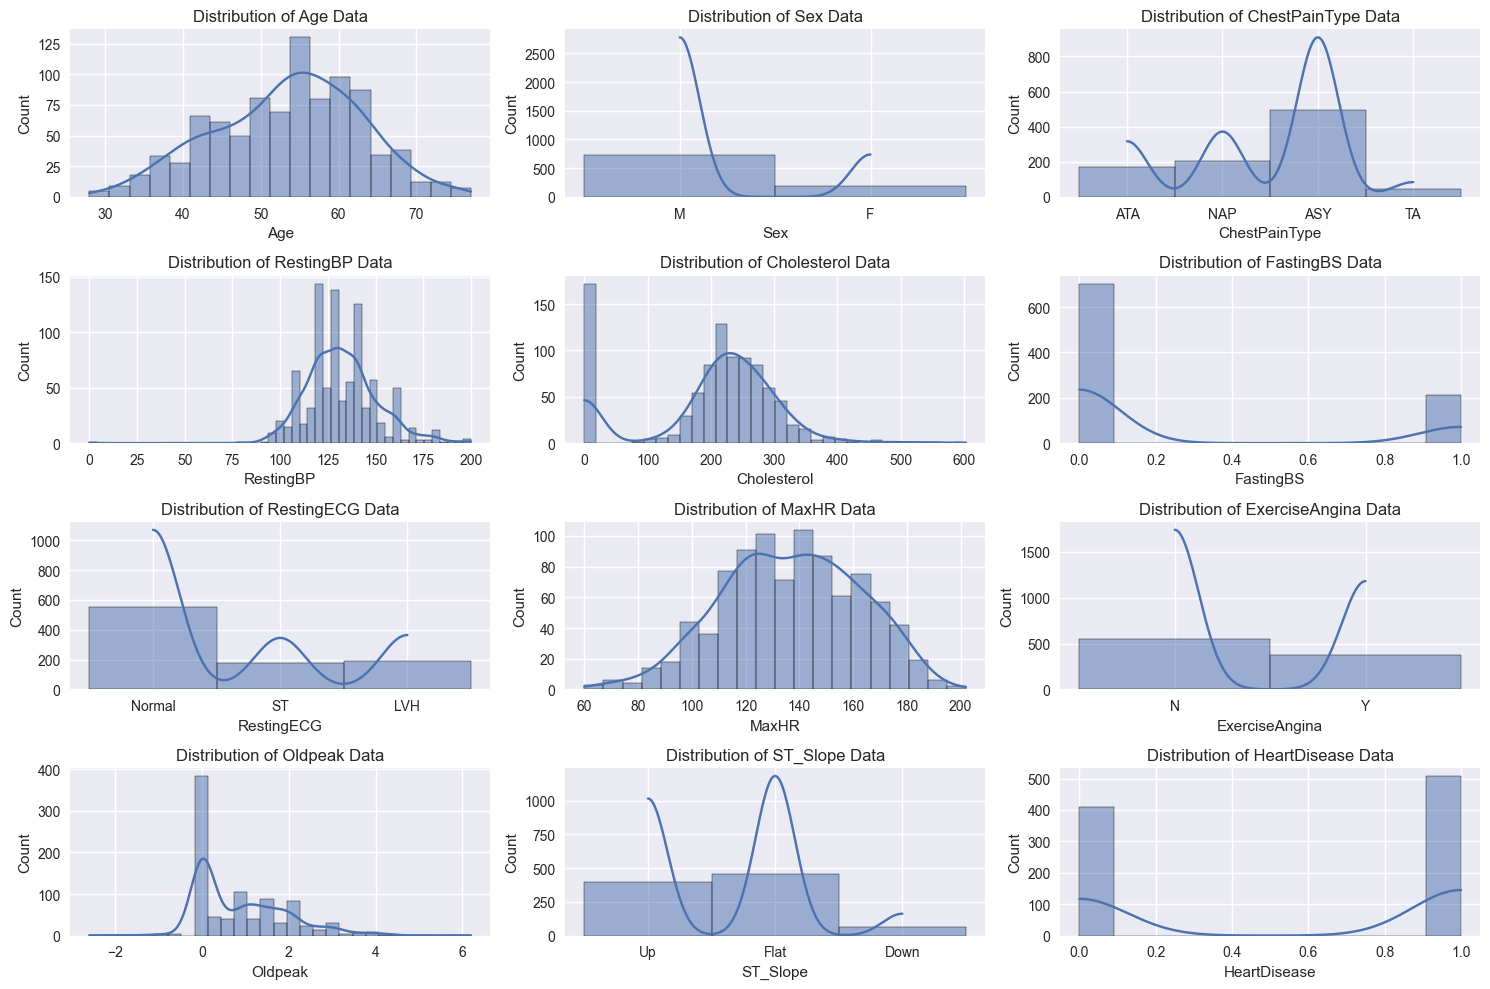

In [589]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True)
    plt.tight_layout()
    plt.plot()

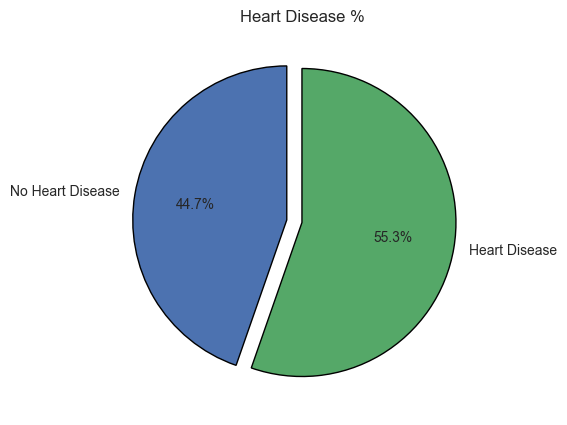

In [590]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')
plt.show()

In [591]:
sex = df[df['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = df[df['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = df[df['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = df[df['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

Text(0.5, 1.0, 'ST_Slope')

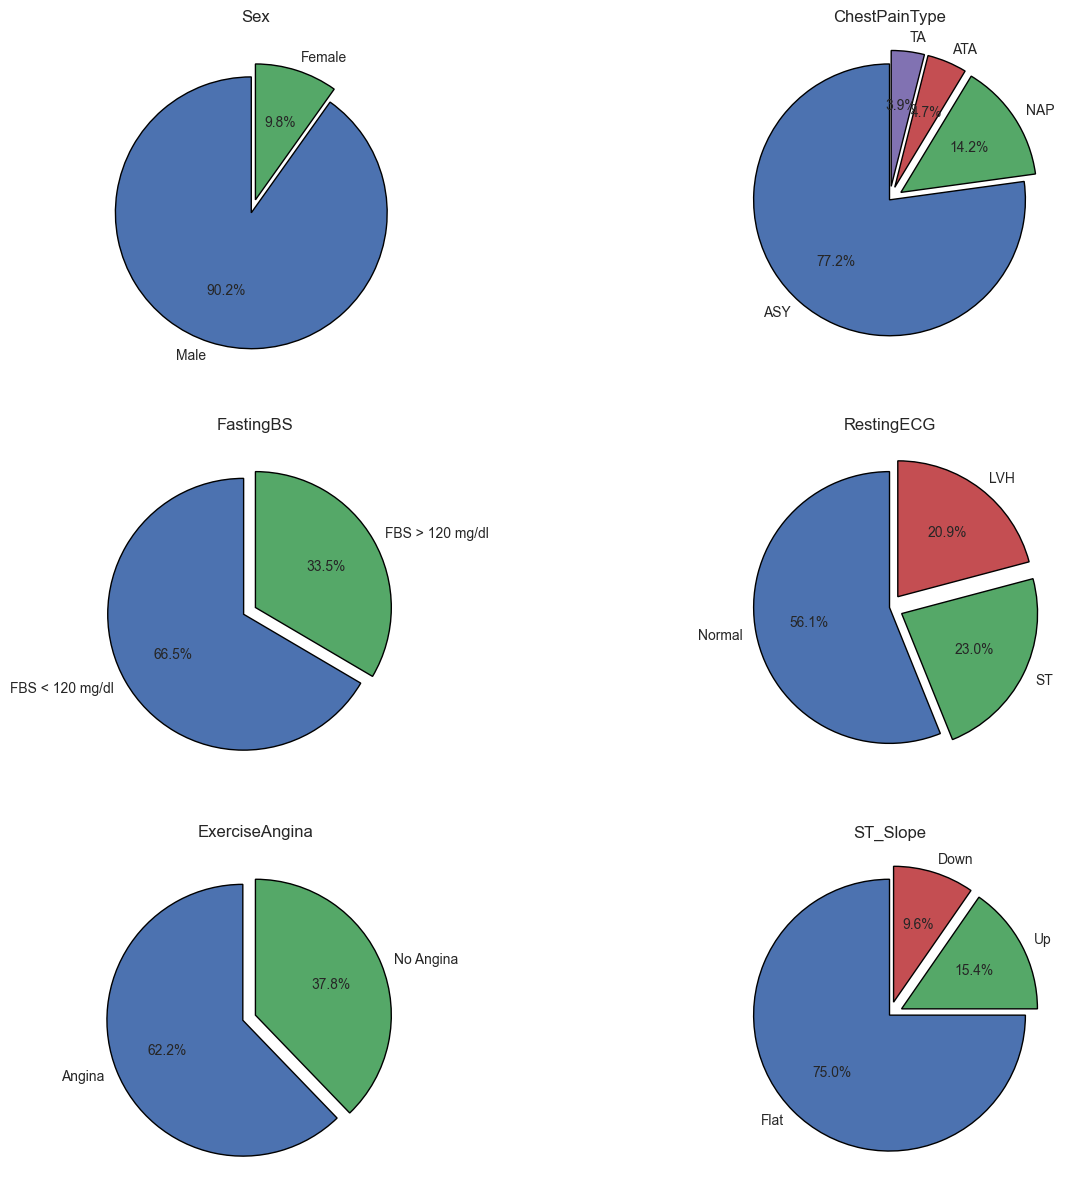

In [592]:
ax, fig = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')

plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')

plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')

plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')

plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')


# Outliers

In [593]:
fig = px.box(df, y="Age", x="HeartDisease", title=f"Distrubution of Age")
fig.show()

In [594]:
fig = px.box(df, y="RestingBP", x="HeartDisease",
             title=f"Distrubution of RestingBP", color="Sex")
fig.show()

In [595]:
fig = px.box(df, y="Cholesterol", x="HeartDisease",
             title=f"Distrubution of Cholesterol")
fig.show()

In [596]:
fig = px.box(df, y="Oldpeak", x="HeartDisease",
             title=f"Distrubution of Oldpeak")
fig.show()

In [597]:
fig = px.box(df, y="MaxHR", x="HeartDisease", title=f"Distrubution of MaxHR")
fig.show()

# Handling Null Values

In [598]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Handling Categorical Variables

In [599]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
M    725
F    193
Name: Sex, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
N    547
Y    371
Name: ExerciseAngina, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: Int64


In [600]:
# df = pd.get_dummies(df, columns=string_col, drop_first=False)
# df

df= df.apply(LabelEncoder().fit_transform)
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


In [601]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop("HeartDisease", axis=1)
scaler = MinMaxScaler()
scaler.fit(X)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [602]:

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


# Training our Machine Learning Models

# Using Logistic Regression

In [603]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [604]:
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred_lr = Lr.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_lr))

Accuracy Score:  0.8478260869565217


In [605]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:  [[130  17]
 [ 39 182]]


In [606]:
from sklearn.metrics import confusion_matrix
conf_lr = confusion_matrix(y_test, y_pred_lr)
conf_lr

array([[130,  17],
       [ 39, 182]])

In [607]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_lr))

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       147
           1       0.91      0.82      0.87       221

    accuracy                           0.85       368
   macro avg       0.84      0.85      0.84       368
weighted avg       0.86      0.85      0.85       368



# Using Naive Bayers

In [608]:
from sklearn.naive_bayes import GaussianNB

In [609]:
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_gb))

Accuracy Score:  0.845108695652174


In [610]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_gb))

Confusion Matrix:  [[132  15]
 [ 42 179]]


In [611]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_gb))

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       147
           1       0.92      0.81      0.86       221

    accuracy                           0.85       368
   macro avg       0.84      0.85      0.84       368
weighted avg       0.86      0.85      0.85       368



# Using K-nearest Neighbors

In [612]:
from sklearn.neighbors import KNeighborsClassifier

In [613]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_knn))


Accuracy Score:  0.8668478260869565


In [614]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))


Confusion Matrix:  [[131  16]
 [ 33 188]]


In [615]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       147
           1       0.92      0.85      0.88       221

    accuracy                           0.87       368
   macro avg       0.86      0.87      0.86       368
weighted avg       0.87      0.87      0.87       368



# Using Decision Tree

In [616]:
from sklearn.tree import DecisionTreeClassifier

In [617]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))

Accuracy Score:  0.7608695652173914


In [618]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:  [[118  29]
 [ 59 162]]


In [619]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_dt))

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.80      0.73       147
           1       0.85      0.73      0.79       221

    accuracy                           0.76       368
   macro avg       0.76      0.77      0.76       368
weighted avg       0.78      0.76      0.76       368



# Using Random Forest

In [620]:
from sklearn.ensemble import RandomForestClassifier

In [621]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))

Accuracy Score:  0.8722826086956522


In [622]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:  [[134  13]
 [ 34 187]]


In [623]:
print("Classification Report: ")
print(classification_report(y_test, y_pred_rf))

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       147
           1       0.94      0.85      0.89       221

    accuracy                           0.87       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.87      0.87       368



# ROC Curve

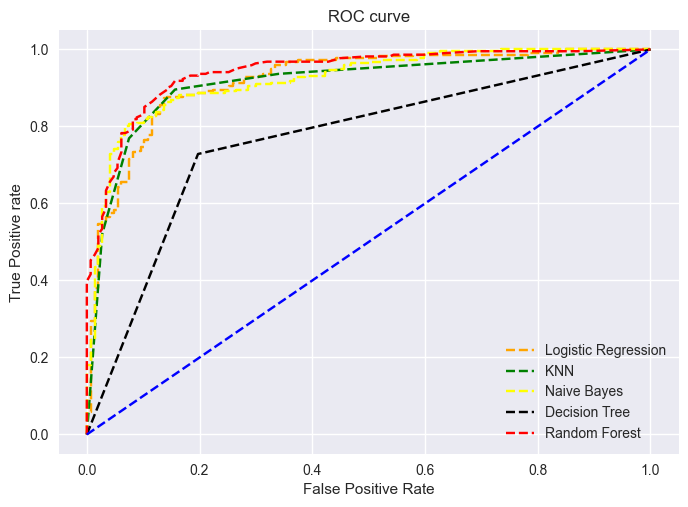

In [624]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors=4)
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)

pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:, 1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:, 1], pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


auc_score1 = roc_auc_score(y_test, pred_prob1[:, 1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:, 1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:, 1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:, 1])
auc_score5 = roc_auc_score(y_test, pred_prob5[:, 1])


plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange',
         label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--', color='yellow', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--', color='black', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--', color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC', dpi=300)
plt.show()


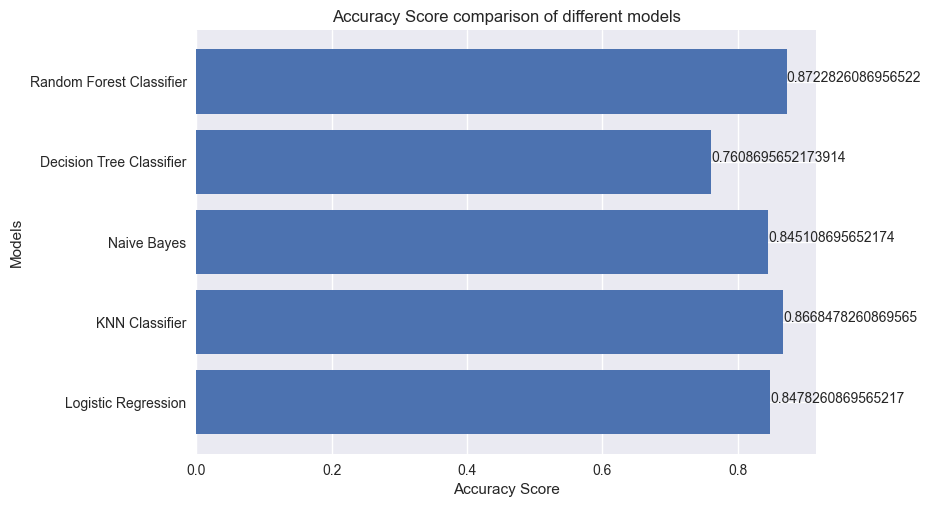

In [673]:
x = ['Logistic Regression', 'KNN Classifier','Naive Bayes',
     'Decision Tree Classifier', 'Random Forest Classifier']
y = [Lr.score(X_test, y_test), knn.score(X_test, y_test), gb.score(
    X_test, y_test), dt.score(X_test, y_test), rf.score(X_test, y_test)]

plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.title('Accuracy Score comparison of different models')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()


# Hyperparameter Tuning

# Random Forest with Hyperparameter Tuning

In [626]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [25,50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3,4,5,6,7,8, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=50)


In [638]:
rf_final = RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=50)
rf_final.fit(X_train,y_train,)

RandomForestClassifier(max_depth=4, max_leaf_nodes=9, n_estimators=50)

In [639]:
rf_final.score(X_test,y_test)

0.8858695652173914

# Naive Bayes with Hyperparameter Tuning

In [629]:
from sklearn.model_selection import GridSearchCV

params = {'priors': [None, [0.1, 0.3, 0.6], [0.2, 0.2, 0.6]]}
grid_search = GridSearchCV(GaussianNB(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)


GaussianNB()


In [630]:
gb_final = GaussianNB()
gb_final .fit(X_train, y_train)

print("Train accuracy:", gb_final.score(X_train, y_train))
print("Test accuracy:", gb_final.score(X_test, y_test))


Train accuracy: 0.8490909090909091
Test accuracy: 0.845108695652174


# Logistic Regression with Hyperparameter Tuning

In [631]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

LogisticRegression(C=1, penalty='l1', solver='liblinear')


In [632]:
lr_final = LogisticRegression(C=0.1, solver='liblinear')
lr_final .fit(X_train, y_train)
lr_final .score(X_test, y_test)

0.8288043478260869

# knn with Hyperparameter Tuning

In [633]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3,4,5,6,7,8,9,10,11,13], 'metric': [
    'euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=params)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

KNeighborsClassifier(metric='manhattan')


In [634]:
knn_final = KNeighborsClassifier(metric='manhattan')
knn_final.fit(X_train, y_train)
knn_final.score(X_test, y_test)

0.8777173913043478

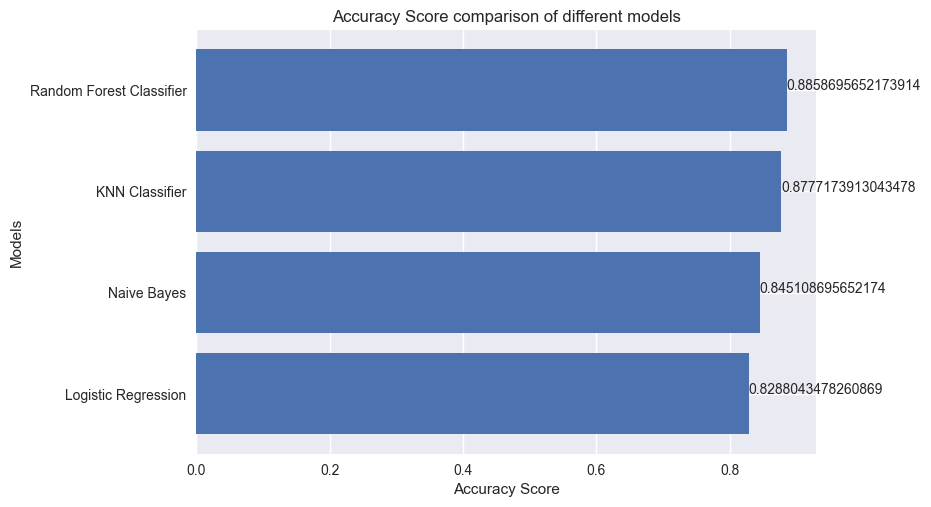

In [674]:
x = ['Logistic Regression', 'Naive Bayes','KNN Classifier' ,'Random Forest Classifier']
y = [lr_final.score(X_test, y_test),gb_final.score(X_test, y_test),knn_final.score(X_test, y_test), rf_final.score(X_test, y_test)]

plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.title('Accuracy Score comparison of different models')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.show()


In [646]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

models = pd.DataFrame({
    'Model': [
        'Logistic Regression', 'KNeighborsClassifier',
        'GaussianNB','Decision Tree', 'Random Forest'
    ],
    'Training Accuracy': [
        lr_final.score(X_train,y_train),knn_final.score(X_train,y_train),gb_final.score(X_train,y_train),dt.score(X_train,y_train),
        rf_final.score(X_train,y_train)
    ],
    'Model f1 Score': [
        f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)
    ],
    'Model Testing Accuracy Score': [
        accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)
    ],
    'Model Precision Score': [
        precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)
    ],
    'Model Recall Score': [
        recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)
    ]

})

In [677]:
models.sort_values(
    by='Model Testing Accuracy Score', ascending=False).style.background_gradient(
        cmap='cool').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen', 
            'font-size': '15px'})

Model,Training Accuracy,Model f1 Score,Model Testing Accuracy Score,Model Precision Score,Model Recall Score
Random Forest,0.870909,0.888361,0.872283,0.935000,0.846154
KNeighborsClassifier,0.878182,0.884706,0.866848,0.921569,0.850679
Logistic Regression,0.840000,0.866667,0.847826,0.914573,0.823529
GaussianNB,0.849091,0.862651,0.845109,0.922680,0.809955
Decision Tree,1.000000,0.786408,0.760870,0.848168,0.733032


In [660]:
y_pred_rf_final = rf_final.predict(X_test)

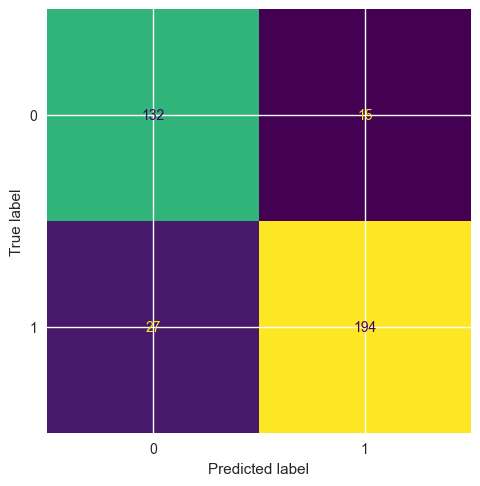

In [678]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(colorbar=False, )

In [679]:
print(classification_report(y_test, y_pred_rf_final))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       147
           1       0.93      0.88      0.90       221

    accuracy                           0.89       368
   macro avg       0.88      0.89      0.88       368
weighted avg       0.89      0.89      0.89       368



In [664]:
y_pred_knn_final = knn_final.predict(X_test)

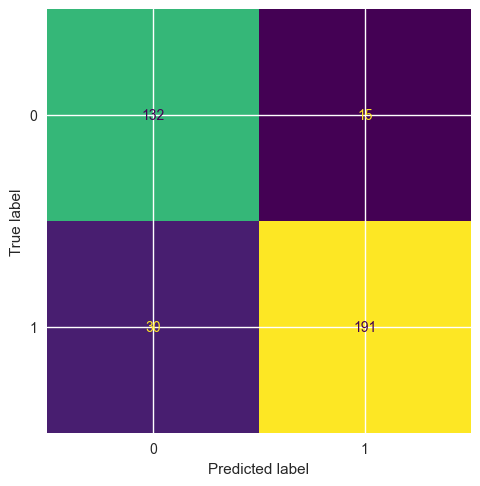

In [668]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_knn_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(colorbar=False)

In [680]:
print(classification_report(y_test, y_pred_knn_final))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       147
           1       0.93      0.86      0.89       221

    accuracy                           0.88       368
   macro avg       0.87      0.88      0.87       368
weighted avg       0.88      0.88      0.88       368



In [669]:
y_pred_lr_final = lr_final.predict(X_test)

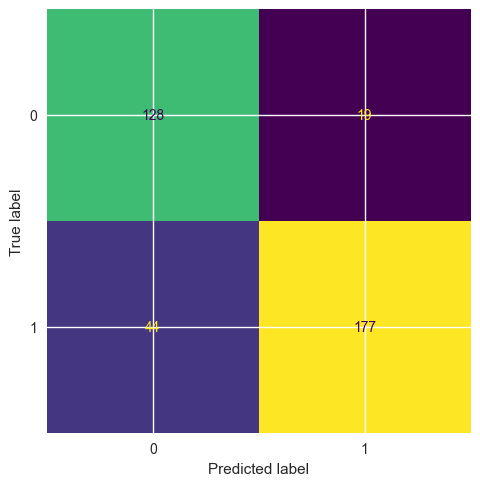

In [670]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_lr_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(colorbar=False)

In [681]:
print(classification_report(y_test, y_pred_lr_final))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       147
           1       0.90      0.80      0.85       221

    accuracy                           0.83       368
   macro avg       0.82      0.84      0.83       368
weighted avg       0.84      0.83      0.83       368



In [671]:
y_pred_gb_final = gb_final.predict(X_test)

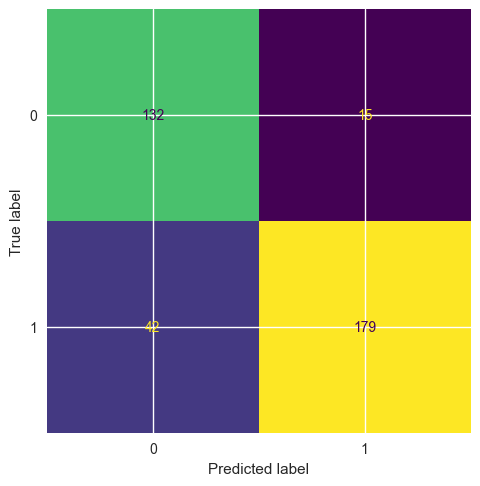

In [672]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_gb_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot(colorbar=False)

In [682]:
print(classification_report(y_test, y_pred_gb_final))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       147
           1       0.92      0.81      0.86       221

    accuracy                           0.85       368
   macro avg       0.84      0.85      0.84       368
weighted avg       0.86      0.85      0.85       368



# saving the model in pickle file

In [649]:
import pickle

In [650]:
with open('model.pkl', 'wb') as f:
    pickle.dump(rf_final, f)